# Softmax scaling --> Temperature Scaling

Scaling the softmax by the natural log of values between 1 and e will alter how the softmax function creates a probability field from the logit data. 

This scaling can be used to counteract bias in the training set.

ln(e) is 1 aka the off the shelf value.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# logits = np.array(np.linspace(0,50))
logits = np.random.normal(40,22,size=(50))
softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis=0, keepdims=True)

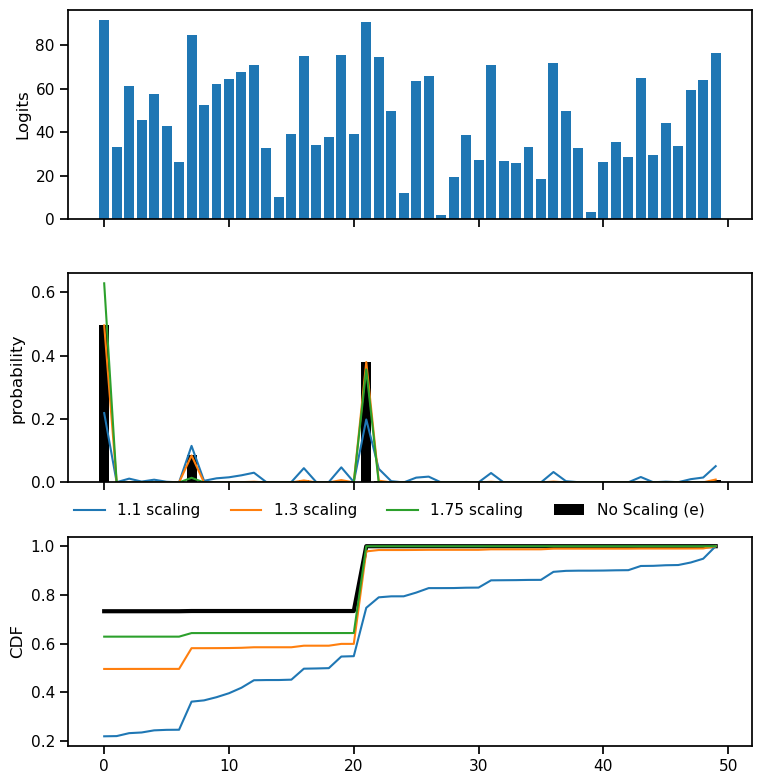

In [44]:
sns.set_context('notebook')
fig, (ax,ax2,ax3) = plt.subplots(3, sharex=True, )
fig.set_size_inches(8,8)
ax.bar(np.arange(0,50),logits)
ax.set_ylabel("Logits")
logits_cooled = logits * np.log(1.3)
softmax_cooled = tf.exp(logits_cooled) / tf.reduce_sum(tf.exp(logits_cooled), axis=0, keepdims=True)
ax2.bar(np.arange(0,50), softmax_cooled, label='No Scaling (e)', lw=3,color='k')
cdf = np.cumsum(softmax)
ax3.plot(np.arange(0,50), cdf, label="No Scaling (e)", lw=3,color='k')

#     softmax_cooled = tf.exp(logits_cooled) / tf.reduce_sum(tf.exp(logits_cooled), axis=0, keepdims=True)
#     ax2.plot(np.arange(0,50), softmax_cooled, label='{} scaling'.format(scale))


for scale in [1.1,1.3,1.75]:
    logits_cooled = logits * np.log(scale)
    softmax_cooled = tf.exp(logits_cooled) / tf.reduce_sum(tf.exp(logits_cooled), axis=0, keepdims=True)
    ax2.plot(np.arange(0,50), softmax_cooled, label='{} scaling'.format(scale))
    cdf = np.cumsum(softmax_cooled)
    ax3.plot(np.arange(0,50), cdf, label="{}".format(scale))


ax2.legend(frameon=False, ncol=4, loc=(0,-.2))
# ax3.legend(frameon=False)
ax2.set_ylabel("probability")
ax3.set_ylabel('CDF')
fig.tight_layout()

# plt.savefig("./figures/softmax-scaling-example.png", dpi=300,)